# News and Stock Movement Analysis

## Data Preparation
- **Data Collection**: I will collect news articles and stock price data for Agilent Technologies (NYSE:A).
- **Data Cleaning**: I will clean the data by removing duplicates and handling any missing values.

## Merging Datasets
- **Merging Data**: I will merge the news and stock data based on dates to align them correctly.
- **Date Alignment**: I need to ensure that the dates in both datasets match; I may need to adjust formats if necessary.

## Correlation Between News and Stock Movement
### Actions to Take
1. **Sentiment Analysis**: I will perform sentiment analysis on the news headlines using tools like `TextBlob` or `nltk`.
2. **Calculate Daily Stock Returns**: I will compute the daily percentage changes in stock prices to represent movements.
3. **Aggregate Sentiments**: I will calculate average daily sentiment scores if multiple articles appear on the same day.
4. **Correlation Analysis**: I will determine the correlation between average daily sentiment scores and daily stock returns.

## KPIs
- **Proactivity to Self-Learn**: I will document my methods and any references I use.
- **Sentiment Analysis**: To be conducted soon.
- **Correlation Strength**: To be calculated after the analysis.

In [1]:
import pandas as pd

# Load historical stock data
aapl_df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
amzn_df = pd.read_csv('../data/yfinance_data/AMZN_historical_data.csv')
goog_df = pd.read_csv('../data/yfinance_data/GOOG_historical_data.csv')
meta_df = pd.read_csv('../data/yfinance_data/META_historical_data.csv')
msft_df = pd.read_csv('../data/yfinance_data/MSFT_historical_data.csv')
nvda_df = pd.read_csv('../data/yfinance_data/NVDA_historical_data.csv')
tsla_df = pd.read_csv('../data/yfinance_data/TSLA_historical_data.csv')

news_df = pd.read_csv('../data/raw_analyst_ratings.csv')  

In [3]:
# Convert date columns to datetime without specifying a format
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')  # This will convert invalid parsing to NaT
aapl_df['date'] = pd.to_datetime(aapl_df['Date'], errors='coerce')  # Adjust if the column name differs

In [4]:
# Check for NaT values
print(news_df[news_df['date'].isna()])
print(aapl_df[aapl_df['date'].isna()])

         Unnamed: 0                                           headline  \
10               10    30 Stocks Moving in Friday's Pre-Market Session   
11               11  SVB Leerink Maintains Outperform on Agilent Te...   
12               12  8 Stocks Moving In Thursday's After-Hours Session   
13               13  Agilent Technologies shares are trading higher...   
14               14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url  \
10       https://www.benzinga.com/news/20/05/1609

In [5]:
import pandas as pd

# Assuming 'news_df' is your DataFrame containing the news data
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')

# Check for NaT values
print(news_df[news_df['date'].isna()])

         Unnamed: 0                                           headline  \
10               10    30 Stocks Moving in Friday's Pre-Market Session   
11               11  SVB Leerink Maintains Outperform on Agilent Te...   
12               12  8 Stocks Moving In Thursday's After-Hours Session   
13               13  Agilent Technologies shares are trading higher...   
14               14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url  \
10       https://www.benzinga.com/news/20/05/1609

In [6]:
# Identify problematic rows
problematic_rows = news_df[news_df['date'].isna()]
print(problematic_rows)

         Unnamed: 0                                           headline  \
10               10    30 Stocks Moving in Friday's Pre-Market Session   
11               11  SVB Leerink Maintains Outperform on Agilent Te...   
12               12  8 Stocks Moving In Thursday's After-Hours Session   
13               13  Agilent Technologies shares are trading higher...   
14               14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url  \
10       https://www.benzinga.com/news/20/05/1609

In [7]:
print(aapl_df.head())
print(amzn_df.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits       date  
0        0.0           0.0 1980-12-12  
1        0.0           0.0 1980-12-15  
2        0.0           0.0 1980-12-16  
3        0.0           0.0 1980-12-17  
4        0.0           0.0 1980-12-18  
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  

In [9]:
# Convert the 'date' column to naive datetime
news_df['date'] = news_df['date'].dt.tz_localize(None)

# Now check the types to confirm they are both datetime64[ns]
print(news_df['date'].dtype)
print(aapl_df['Date'].dtype)  # Check the stock DataFrame's Date column as well

datetime64[ns]
object


In [12]:
# Check the data type of the 'date' column
print(news_df['date'].dtype)

datetime64[ns]


In [13]:
# Check the data type of the 'Date' column in the stock DataFrame
print(aapl_df['Date'].dtype)

object


In [14]:
# Convert 'Date' column to datetime
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'], errors='coerce')

# Check the data type after conversion
print(aapl_df['Date'].dtype)

datetime64[ns]


In [15]:
# Check for NaT values
print(aapl_df[aapl_df['Date'].isna()])  # Display rows where the conversion failed

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Dividends, Stock Splits, date]
Index: []


In [16]:
# Merge datasets on the date columns
merged_df = pd.merge(news_df, aapl_df, left_on='date', right_on='Date', how='inner')

# Check the merged DataFrame
print(merged_df.head())

Empty DataFrame
Columns: [Unnamed: 0, headline, url, publisher, date_x, stock, Date, Open, High, Low, Close, Adj Close, Volume, Dividends, Stock Splits, date_y]
Index: []


In [17]:
# Check unique dates in the news DataFrame
print(news_df['date'].unique())

# Check unique dates in the stock DataFrame
print(aapl_df['Date'].unique())

<DatetimeArray>
['2020-06-05 10:30:54', '2020-06-03 10:45:20', '2020-05-26 04:30:07',
 '2020-05-22 12:45:06', '2020-05-22 11:38:59', '2020-05-22 11:23:25',
 '2020-05-22 09:36:20', '2020-05-22 09:07:04', '2020-05-22 08:37:59',
 '2020-05-22 08:06:17',
 ...
 '2020-06-04 16:08:51', '2020-06-04 16:07:40', '2018-06-15 09:01:12',
 '2018-06-13 16:52:35', '2018-05-17 06:01:41', '2018-03-15 06:01:22',
 '2017-12-06 09:12:01', '2017-12-06 07:04:31', '2017-11-15 06:04:52',
 '2017-11-14 13:25:57']
Length: 36012, dtype: datetime64[ns]
<DatetimeArray>
['1980-12-12 00:00:00', '1980-12-15 00:00:00', '1980-12-16 00:00:00',
 '1980-12-17 00:00:00', '1980-12-18 00:00:00', '1980-12-19 00:00:00',
 '1980-12-22 00:00:00', '1980-12-23 00:00:00', '1980-12-24 00:00:00',
 '1980-12-26 00:00:00',
 ...
 '2024-07-17 00:00:00', '2024-07-18 00:00:00', '2024-07-19 00:00:00',
 '2024-07-22 00:00:00', '2024-07-23 00:00:00', '2024-07-24 00:00:00',
 '2024-07-25 00:00:00', '2024-07-26 00:00:00', '2024-07-29 00:00:00',
 '2024-07

In [21]:
# Sample dates from the news DataFrame
print(news_df['date'].head())

# Sample dates from the stock DataFrame
print(aapl_df['Date'].head())

0   2020-06-05 10:30:54
1   2020-06-03 10:45:20
2   2020-05-26 04:30:07
3   2020-05-22 12:45:06
4   2020-05-22 11:38:59
Name: date, dtype: datetime64[ns]
0   1980-12-12
1   1980-12-15
2   1980-12-16
3   1980-12-17
4   1980-12-18
Name: Date, dtype: datetime64[ns]


In [22]:
# Convert the 'date' column in news_df to just the date (removing the time)
news_df['date'] = news_df['date'].dt.date  # This will convert to a date object

# Check the updated DataFrame
print(news_df['date'].head())

0    2020-06-05
1    2020-06-03
2    2020-05-26
3    2020-05-22
4    2020-05-22
Name: date, dtype: object


In [24]:
# Convert 'Date' column to datetime
news_df['Date'] = pd.to_datetime(aapl_df['Date'], errors='coerce')

# Check the data type after conversion
print(news_df['Date'].dtype)

datetime64[ns]


In [26]:
# Check the columns in both DataFrames
print(news_df.columns)
print(aapl_df.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock', 'Date'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'date'],
      dtype='object')


In [28]:
# Rename columns for clarity
news_df.rename(columns={'date': 'news_date'}, inplace=True)
aapl_df.rename(columns={'Date': 'stock_date'}, inplace=True)

In [29]:
# Convert to datetime
news_df['news_date'] = pd.to_datetime(news_df['news_date'], errors='coerce')
aapl_df['stock_date'] = pd.to_datetime(aapl_df['stock_date'], errors='coerce')

In [31]:
# Merge the datasets
merged_df = pd.merge(news_df, aapl_df, left_on='news_date', right_on='stock_date', how='inner')

# Check the merged DataFrame
print(merged_df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

   news_date stock       Date stock_date       Open       High        Low  \
0 2020-06-05     A 1980-12-12 2020-06-05  80.837502  82.937500 

In [32]:
# Drop the redundant 'date' column if it's not needed
merged_df.drop(columns=['date'], inplace=True)

In [36]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(headline):
    return TextBlob(headline).sentiment.polarity

# Apply sentiment analysis
merged_df['sentiment_score'] = merged_df['headline'].apply(get_sentiment)

In [37]:
merged_df['daily_return'] = merged_df['Close'].pct_change()

In [38]:
daily_sentiment = merged_df.groupby('news_date')['sentiment_score'].mean().reset_index()

In [39]:
merged_analysis = pd.merge(daily_sentiment, merged_df[['news_date', 'daily_return']], on='news_date')
correlation = merged_analysis['sentiment_score'].corr(merged_analysis['daily_return'])

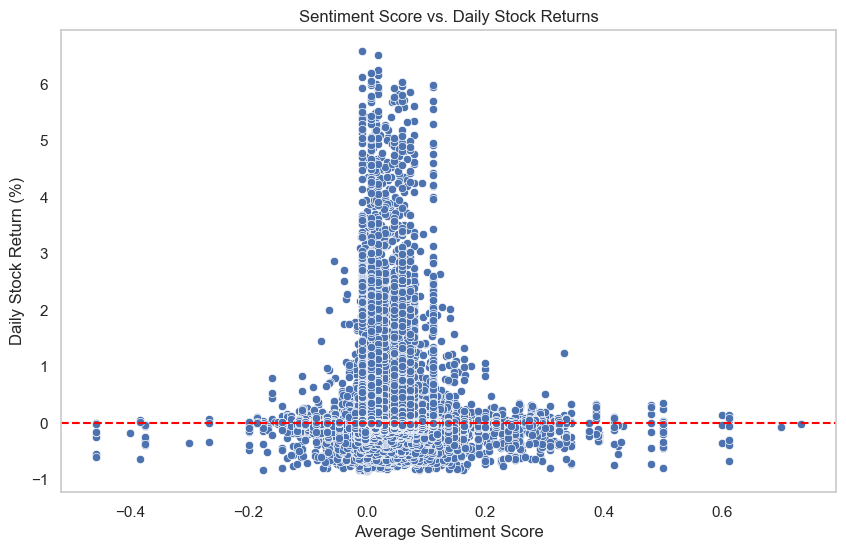

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_analysis, x='sentiment_score', y='daily_return')
plt.title('Sentiment Score vs. Daily Stock Returns')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Stock Return (%)')
plt.axhline(0, color='red', linestyle='--')  # Line at y=0 for reference
plt.grid()
plt.show()

### Interpretation of the Scatter Plot

1. **Overall Distribution**:
   - The scatter plot displays a wide range of daily stock returns, with most points clustered around the zero line, indicating that many days had little to no stock movement.

2. **Sentiment Score Range**:
   - The average sentiment scores range from negative to positive, with most scores being close to zero. This suggests that many headlines had a neutral sentiment.

3. **Correlation Observation**:
   - There is no clear linear relationship between the average sentiment scores and daily stock returns. Points are scattered widely across the plot, indicating that changes in sentiment do not strongly predict stock price movements.

4. **Outliers**:
   - A few points show positive daily returns (above the zero line), even with low average sentiment scores. This suggests that there are instances where stock performance does not align with sentiment, possibly due to external market factors or company-specific news.

5. **Zero Line Reference**:
   - The red dashed line at y=0 serves as a reference point. Most daily returns are around this line, indicating that sentiment may not significantly influence stock price changes on a daily basis.

### Conclusion

- **Limited Correlation**: The lack of a clear trend in the scatter plot suggests that sentiment scores alone may not effectively predict stock movements for Agilent Technologies.
- **Further Analysis Needed**: It may be useful to explore other factors influencing stock prices, such as broader market trends, economic indicators, or specific events affecting the company.
- **Potential for Aggregation**: Aggregating sentiment over longer periods (e.g., weekly or monthly) might yield different insights, as daily fluctuations can be noisy.

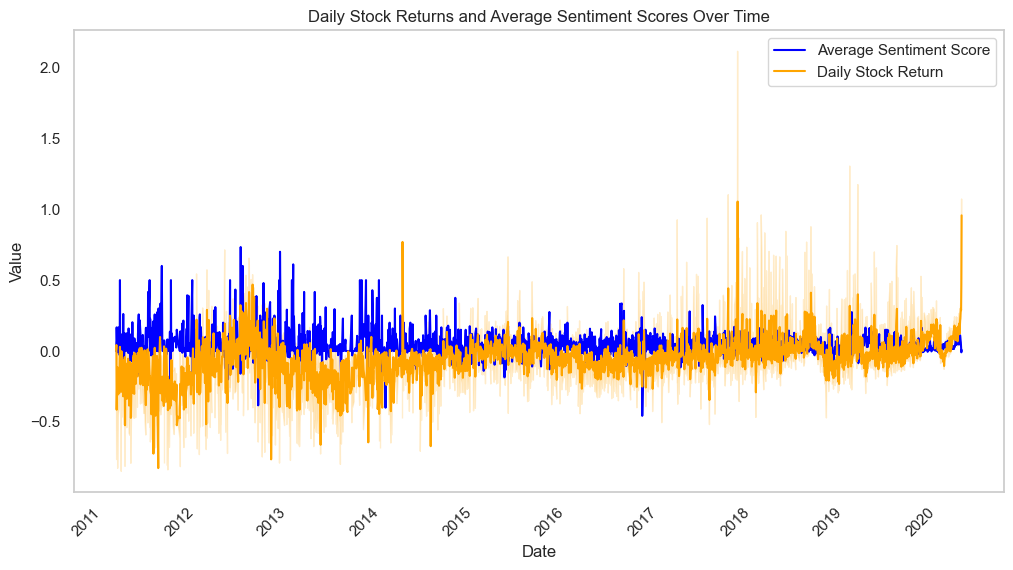

In [42]:
plt.figure(figsize=(12, 6))

# Plot average sentiment scores
sns.lineplot(data=daily_sentiment, x='news_date', y='sentiment_score', label='Average Sentiment Score', color='blue')

# Plot daily returns
sns.lineplot(data=merged_analysis, x='news_date', y='daily_return', label='Daily Stock Return', color='orange')

plt.title('Daily Stock Returns and Average Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Interpretation of the Line Plot

1. **Overall Trends**:
   - The plot shows the average sentiment scores (in blue) and daily stock returns (in orange) over time from 2011 to 2020.
   - Both metrics exhibit fluctuations, but they do not follow the same pattern, indicating that sentiment and stock returns may not be directly correlated.

2. **Average Sentiment Scores**:
   - The average sentiment scores hover around the zero line, indicating a mostly neutral sentiment over the years. There are some periods of higher positive sentiment, but these are infrequent.

3. **Daily Stock Returns**:
   - The daily stock returns show significant volatility, with frequent fluctuations above and below the zero line. This suggests that stock performance can be quite variable, regardless of sentiment.

4. **Periods of High Volatility**:
   - Notable spikes in daily returns (both positive and negative) are observed at various points, particularly around significant market events or company news. These spikes suggest that external factors may have a stronger influence on stock returns than sentiment alone.

5. **Correlation Observations**:
   - There is no consistent relationship between average sentiment scores and daily stock returns. For instance, periods of high average sentiment do not consistently correspond with high stock returns, indicating that sentiment may not be a reliable predictor of stock performance in this context.

6. **Long-Term Stability**:
   - The average sentiment scores appear relatively stable over the long term, while stock returns show more significant variability. This suggests that while sentiment may influence short-term perceptions, it does not lead to